In [1]:
import os 
import sys
from transformer import to_zarr
cwd = os.path.split(os.getcwd())[0]
sys.path.insert(0, cwd)

In [2]:
from CLasso import *

import numpy as np
import matplotlib.pyplot as plt

#### To generate the data :

In [3]:
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)

#### To define the problem :

In [4]:
problem = classo_problem(X,y,C)

#### solve the problem with its default parameters :

In [5]:
problem.solve()

#### Zarr storage

In [6]:
root = to_zarr(problem)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   └── y (100,) float64
 ├── formulation
 ├── label (100,) <U2
 ├── model_selection
 │   ├── CVparameters
 │   │   └── lambdas (500,) float64
 │   ├── LAMfixedparameters
 │   ├── PATHparameters
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       ├── formulation
 │       └── theoretical_lam () float64
 └── solution
     └── StabSel
         ├── distribution (100,) float64
         ├── distribution_path (500, 100) float64
         ├── label (100,) <U2
         ├── lambdas_path (500,) float64
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (5,) int64

#### To plot the solutions, as graphs :

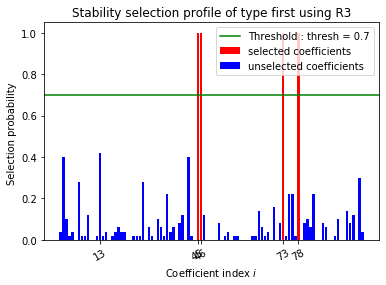

SELECTED VARIABLES : 
45
46
73
78


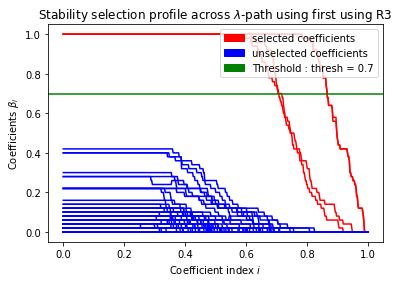

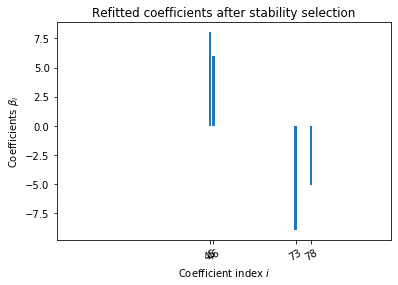

Running time : 
Running time for Path computation    : 'not computed'
Running time for Cross Validation    : 'not computed'
Running time for Stability Selection : 2.109s
Running time for Fixed LAM           : 'not computed'

In [7]:
problem.solution

#### To solve a problem different than the default parameters :

In [8]:
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = True
problem.formulation.concomitant             = False
problem.model_selection.CV                  = True
problem.model_selection.LAMfixed            = True
problem.model_selection.StabSelparameters.method = 'max'

In [9]:
problem.solve()

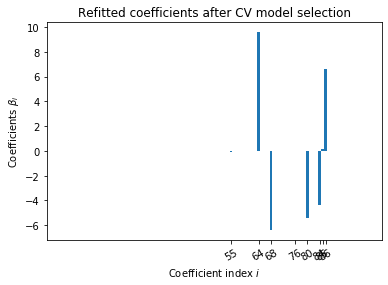

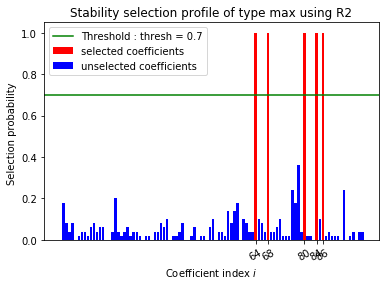

SELECTED VARIABLES : 
64
68
80
84
86


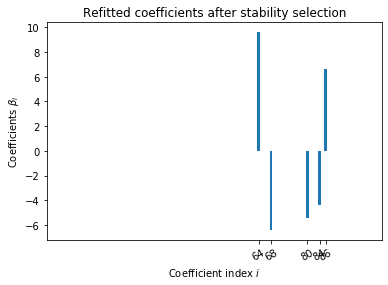

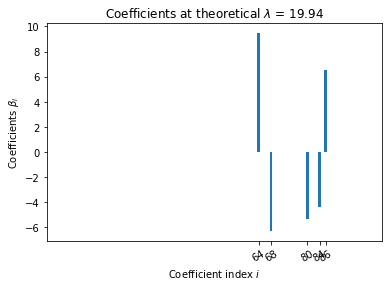

Running time : 
Running time for Path computation    : 'not computed'
Running time for Cross Validation    : 1.724s
Running time for Stability Selection : 5.856s
Running time for Fixed LAM           : 0.117s

In [10]:
problem.solution

In [11]:
root = to_zarr(problem)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   └── y (100,) float64
 ├── formulation
 ├── label (100,) <U2
 ├── model_selection
 │   ├── CVparameters
 │   │   ├── formulation
 │   │   └── lambdas (500,) float64
 │   ├── LAMfixedparameters
 │   │   ├── formulation
 │   │   └── theoretical_lam () float64
 │   ├── PATHparameters
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       ├── formulation
 │       └── theoretical_lam () float64
 └── solution
     ├── CV
     │   ├── beta (100,) float64
     │   ├── label (100,) <U2
     │   ├── lambda_1SE () float64
     │   ├── lambda_min () float64
     │   ├── refit (100,) float64
     │   ├── selected_param (100,) bool
     │   ├── standard_error (500,) float64
     │   ├── xGraph (500,) float64
     │   └── yGraph (500,) float64
     ├── LAMfixed
     │   ├── beta (100,) float64
     │   ├── formulation
     │   ├── label (100,) <U2
     │   ├── lam () float64
     │   ├── lambdamax () float64
     │   ├── refit (100,) float64
     │   └── selected_param (100,) bool
     └── StabSel
         ├── distribution (100,) float64
         ├── label (100,) <U2
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (5,) int64

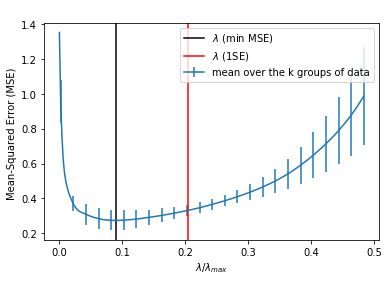

In [12]:
problem.solution.CV.graphic(mse_max = 1.)

#### To show that the CV (also works for SS) depends only on the seed we choose :

In [13]:
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

Difference of solution beta for same seed  0.0
Difference of solution beta for different seeds  0.04134921793825836
